In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
from extinction import ccm89, apply, remove
import matplotlib.cm as cm
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from scipy import integrate
from scipy.stats import linregress

In [2]:
df = pd.read_csv(r'C:\Users\senan\OneDrive\Desktop\Capstone\csv_files\TiII_integral_values.csv')       #original wrong values crap bounds and senan normalisation
df.sort_values(by='Phase of spectrum', inplace=True)
ztfname = np.array(df['ztfname'])
fileD = np.array(df['Dereddened File Name'])
phase = np.array(df['Phase of spectrum'])
integral = np.array(df['integral'])
z = np.array(df['z'])

dfU = pd.read_csv(r'C:\Users\senan\OneDrive\Desktop\Capstone\csv_files\ztf_umt_subtype_5972.csv')
ztfnameU = np.array(dfU['ztfname'])
subtypeU = np.array(dfU['New_Type'])
fileU = np.array(dfU['filename'])

dfi = pd.read_csv(r'C:\Users\senan\OneDrive\Desktop\Capstone\csv_files\Master_info.csv')
ztfnamei = np.array(dfi['ztfname'])
fileDi = np.array(dfi['Dereddened File Name'])
filei = np.array(dfi['File Name'])
subtypei = np.array(dfi['SN Sub Type'])

dfn = pd.read_csv(r'C:\Users\senan\OneDrive\Desktop\Capstone\csv_files\TiII_new_integral_values.csv')   #new integral values clamped bounds and umut normalisation
dfn.sort_values(by='Phase of spectrum', inplace=True)
ztfnamen = np.array(dfn['ztfname'])
fileDn = np.array(dfn['Dereddened File Name'])
phasen = np.array(dfn['Phase of spectrum'])
integraln = np.array(dfn['integral'])
zn = np.array(df['z'])

dfc1 = pd.read_csv(r'C:\Users\senan\OneDrive\Desktop\Capstone\csv_files\TiII_integral_values_old_clicks.csv') #crap first clicks for bounds and umut normalistion
dfc1.sort_values(by='Phase of spectrum', inplace=True)
ztfnamec1 = np.array(dfc1['ztfname'])
fileDc1 = np.array(dfc1['Dereddened File Name'])
phasec1 = np.array(dfc1['Phase of spectrum'])
integralc1 = np.array(dfc1['integral'])
zc1 = np.array(dfc1['z'])

dfc2 = pd.read_csv(r'C:\Users\senan\OneDrive\Desktop\Capstone\csv_files\TiII_integral_values_new_clicks.csv') #good second clicks for bounds and umut normalistion
dfc2.sort_values(by='Phase of spectrum', inplace=True)
ztfnamec2 = np.array(dfc2['ztfname'])
fileDc2 = np.array(dfc2['Dereddened File Name'])
phasec2 = np.array(dfc2['Phase of spectrum'])
integralc2 = np.array(dfc2['integral'])
zc2 = np.array(dfc2['z'])

subtype = []
for i in range(len(fileDn)):
    for j in range(len(fileDi)):
        if fileDn[i] == fileDi[j]:
            subtype.append(subtypei[j])
subtype = np.array(subtype)

for i in range(len(ztfnamen)):
    for j in range(len(ztfnameU)):
        if ztfnamen[i] == ztfnameU[j]:
            print(ztfnamen[i],subtype[i], '       ',ztfnameU[j], subtypeU[j])

for i in range(len(subtype)):
    if ztfnamen[i] == 'ZTF18absnqyo':
        subtype[i] = 'SN Ia'
    elif ztfnamen[i] == 'ZTF20abqmtsh':
        subtype[i] = 'SN Ia'

print(len(subtype),subtype)

ZTF20abqbzuv norm/04gs         ZTF20abqbzuv 04gs-like
ZTF18acehilk norm         ZTF18acehilk normal
ZTF20aazkxcw norm         ZTF20aazkxcw normal
ZTF19acynije 91bg/86G         ZTF19acynije 86G-like
ZTF19abrogbl norm         ZTF19abrogbl normal
ZTF20aaymbjk norm         ZTF20aaymbjk normal
ZTF20abqmtsh norm         ZTF20abqmtsh SN Ia
ZTF20acoyyly norm         ZTF20acoyyly normal
ZTF18absnqyo norm         ZTF18absnqyo SN Ia
ZTF19abpbmli norm/04gs         ZTF19abpbmli 04gs-like
ZTF20aamkyyx norm/04gs         ZTF20aamkyyx 04gs-like
70 ['norm' 'norm' 'norm' 'norm' 'norm' '91t' 'norm' 'norm' 'norm' 'norm'
 '91bg' 'norm' 'norm/04gs' '91bg' 'norm' 'norm' 'norm' 'norm' 'norm'
 'norm' '91bg' 'norm' 'norm' 'norm' 'norm' 'norm' 'norm' '91bg' 'norm'
 '91bg' '91bg' 'norm' 'norm' 'norm' 'norm' '91bg/86G' 'norm' 'norm' 'norm'
 '91bg' 'norm' '91bg' 'norm' 'norm' 'norm' 'norm' 'norm' '91bg' '91bg'
 'SN Ia' 'norm' 'norm' 'norm' 'norm' 'norm' 'norm' 'norm' 'norm' 'nan'
 'norm' 'norm' 'norm' 'norm' 'norm' 

In [12]:
name_125 = []
integral_125 = []
phase_125 = []
subtype_125 = []
for i in range(len(ztfnamec2)):
    if integralc2[i] >= 125:
        name_125.append(ztfnamec2[i])
        integral_125.append(integralc2[i])
        phase_125.append(phasec2[i])
        subtype_125.append(subtype[i])

name_125 = np.array(name_125)
integral_125 = np.array(integral_125)
phase_125 = np.array(phase_125)
subtype_125 = np.array(subtype_125)
print(subtype_125)
#df_125 = pd.DataFrame({name_125:'ztfname', integral_125:'integral', phase_125:'phase', subtype_125:'subtype'})
#df_125

df1 = pd.DataFrame(name_125)
df2 = pd.DataFrame(integral_125)
df3 = pd.DataFrame(phase_125)
df4 = pd.DataFrame(subtype_125)
fdf = pd.concat([df1, df2, df3, df4], axis=1)
findf = fdf.set_axis(['ztfname', 'integral', 'phase', 'subtype'], axis=1)
findf.to_csv(r'C:\Users\senan\OneDrive\Desktop\Capstone\csv_files\integrals_above_125.csv')

['norm' 'norm' 'norm/04gs' '91bg' 'norm' 'norm' 'norm' '91bg' 'norm'
 'norm' '91bg' '91bg' '91bg' '91bg/86G' '91bg' 'norm' '91bg' 'norm' 'norm'
 '91bg' '91bg' 'norm' 'nan' '91bg' 'norm' '91bg']


In [4]:
fileD04gs = []
phase04gs = []
ztfname04gs = []
integral04gs = []
z04gs = []
for i in range(len(subtype)):
    if subtype[i] == 'norm/04gs':
        fileD04gs.append(fileDc2[i])
        phase04gs.append(phasec2[i])
        ztfname04gs.append(ztfnamec2[i])
        integral04gs.append(integralc2[i])
        z04gs.append(zc2[i])

fileD04gs = np.array(fileD04gs)
phase04gs = np.array(phase04gs)
ztfname04gs = np.array(ztfname04gs)
integral04gs = np.array(integral04gs)
z04gs = np.array(z04gs)


(-13.0, -4.0)

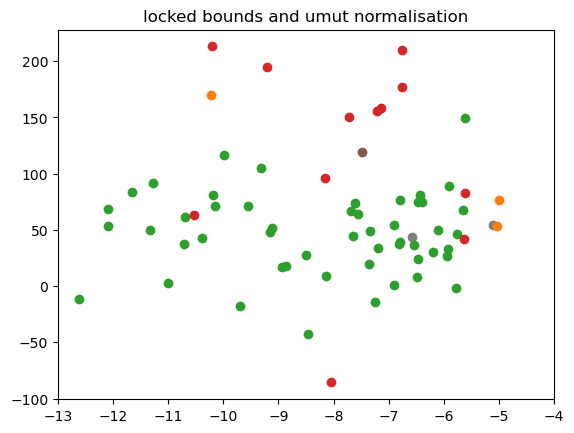

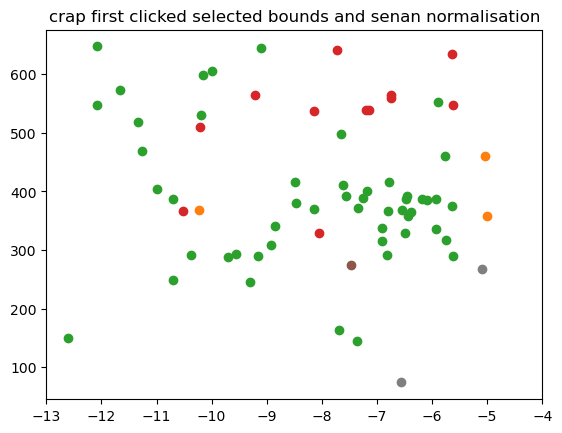

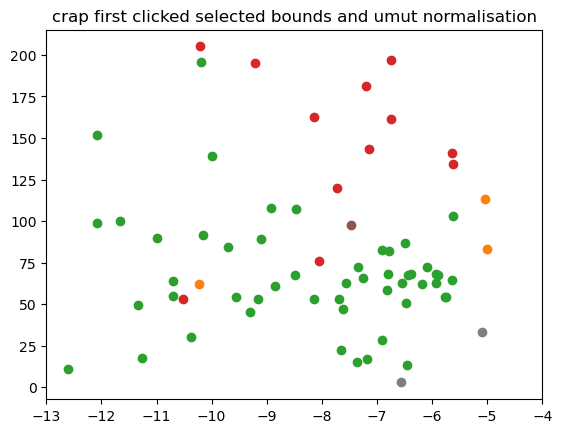

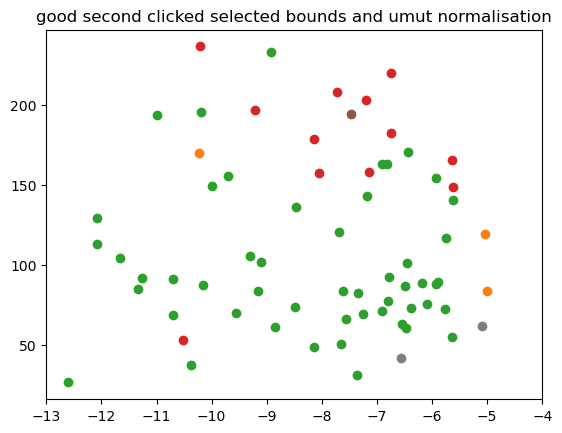

In [5]:
plt.figure(1)
plt.title('locked bounds and umut normalisation')
for j in range(len(subtype)):
    if subtype[j] == 'norm':
        colour = 'tab:green'
    elif subtype[j] == '91bg':
        colour = 'tab:red'
    elif subtype[j] == '99aa':
        colour = 'tab:cyan'
    elif subtype[j] == 'norm/04gs':
        colour = 'tab:orange'
    elif subtype[j] == '91bg/86G':
        colour = 'tab:brown'
    elif subtype[j] == '91T':
        colour = 'tab:blue'
    elif subtype[j] == 'SN Ia':
        colour = 'tab:gray'
    plt.scatter(phasen[j],integraln[j], color=colour)
plt.xlim(-13,-4)

plt.figure(2)
plt.title('crap first clicked selected bounds and senan normalisation')
for j in range(len(subtype)):
    if subtype[j] == 'norm':
        colour = 'tab:green'
    elif subtype[j] == '91bg':
        colour = 'tab:red'
    elif subtype[j] == '99aa':
        colour = 'tab:cyan'
    elif subtype[j] == 'norm/04gs':
        colour = 'tab:orange'
    elif subtype[j] == '91bg/86G':
        colour = 'tab:brown'
    elif subtype[j] == '91T':
        colour = 'tab:blue'
    elif subtype[j] == 'SN Ia':
        colour = 'tab:gray'
    plt.scatter(phase[j],integral[j], color=colour)
plt.xlim(-13,-4)

plt.figure(3)
plt.title('crap first clicked selected bounds and umut normalisation')
for j in range(len(subtype)):
    if subtype[j] == 'norm':
        colour = 'tab:green'
    elif subtype[j] == '91bg':
        colour = 'tab:red'
    elif subtype[j] == '99aa':
        colour = 'tab:cyan'
    elif subtype[j] == 'norm/04gs':
        colour = 'tab:orange'
    elif subtype[j] == '91bg/86G':
        colour = 'tab:brown'
    elif subtype[j] == '91T':
        colour = 'tab:blue' 
    elif subtype[j] == 'SN Ia':
        colour = 'tab:gray'
    plt.scatter(phasec1[j],integralc1[j], color=colour)
    plt.xlim(-13,-4)

plt.figure(4)
plt.title('good second clicked selected bounds and umut normalisation')
for j in range(len(subtype)):
    if subtype[j] == 'norm':
        colour = 'tab:green'
    elif subtype[j] == '91bg':
        colour = 'tab:red'
    elif subtype[j] == '99aa':
        colour = 'tab:cyan'
    elif subtype[j] == 'norm/04gs':
        colour = 'tab:orange'
    elif subtype[j] == '91bg/86G':
        colour = 'tab:brown'
    elif subtype[j] == '91T':
        colour = 'tab:blue' 
    elif subtype[j] == 'SN Ia':
        colour = 'tab:gray'
    plt.scatter(phasec2[j],integralc2[j], color=colour)
plt.xlim(-13,-4)

In [6]:
wavelength_min = 3900
wavelength_max = 4500
ahh = 'hello\goodbye'
slash = ahh[5]

1 SN2011fe_2011-08-25_00-00-00_TNG_DOLORES_PTF_-16.00d.ascii


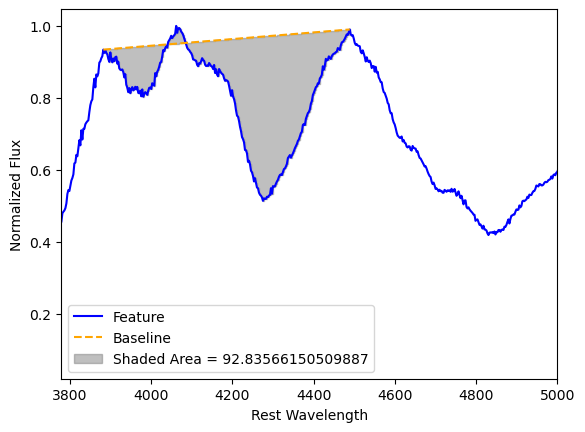

2 SN2011fe_2011-08-25_03-55-33_Lick-3m_KAST_PTF_-15.84d.ascii


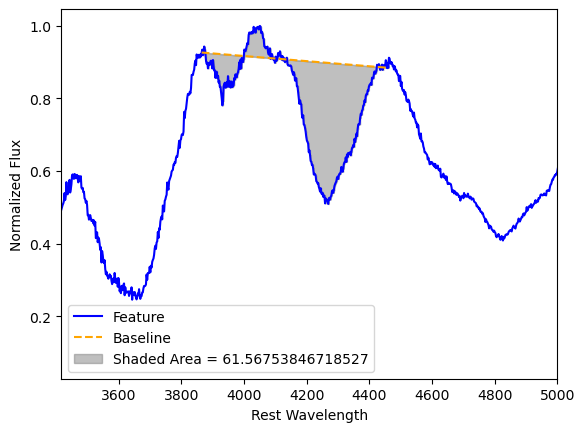

3 SN2011fe_2011-08-26_00-00-00_UH88_SNIFS_None_-15.00d.dat


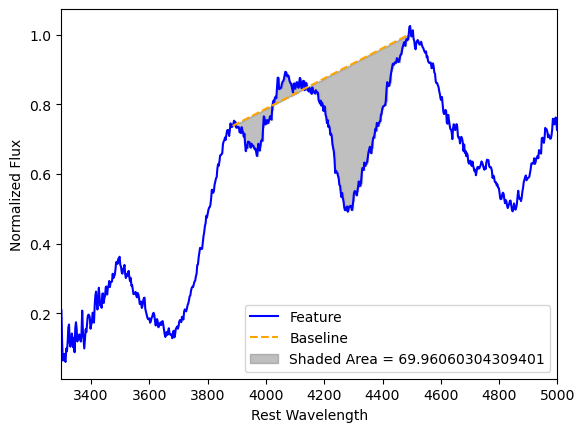

4 SN2011fe_2011-08-26_06-14-21_UH88_SNIFS_PTF_-14.74d.ascii


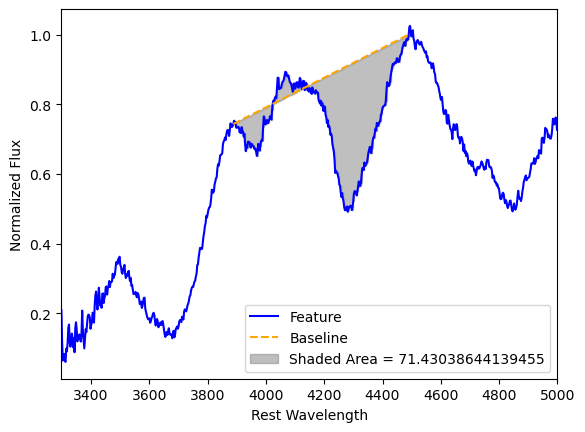

5 SN2011fe_2011-08-26_06-19-44_UH88_SNIFS_SNfactory_-14.74d.dat


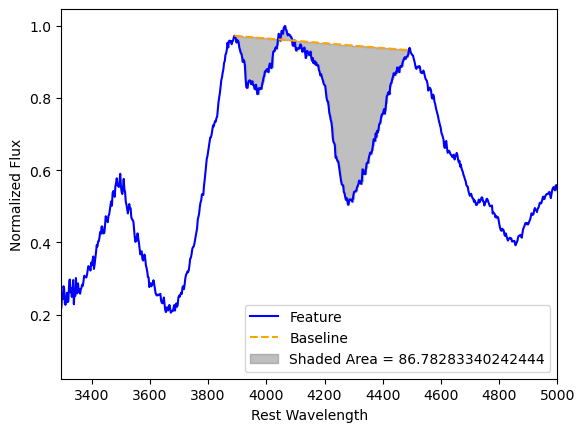

6 SN2011fe_2011-08-27_05-55-38_UH88_SNIFS_SNfactory_-13.75d.dat


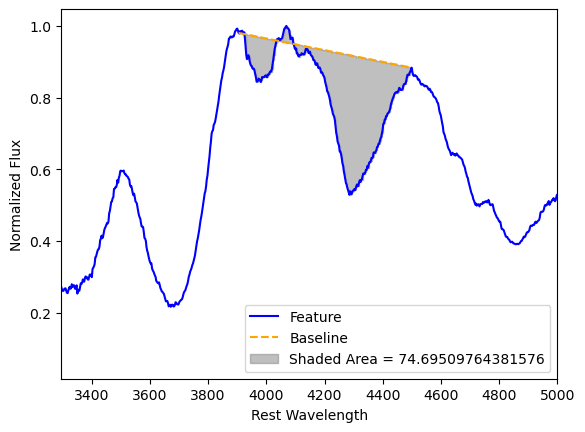

7 SN2011fe_2011-08-28_00-00-00_P200_DBSP_PTF-Ia_-13.00d.ascii


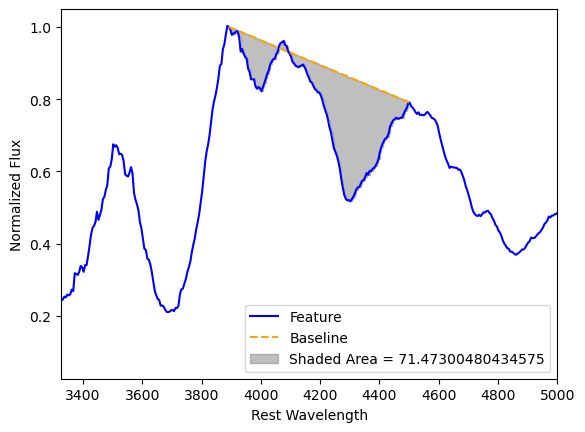

8 SN2011fe_2011-08-28_04-05-00_HST_STIS_HST-Ia_-12.83d.dat


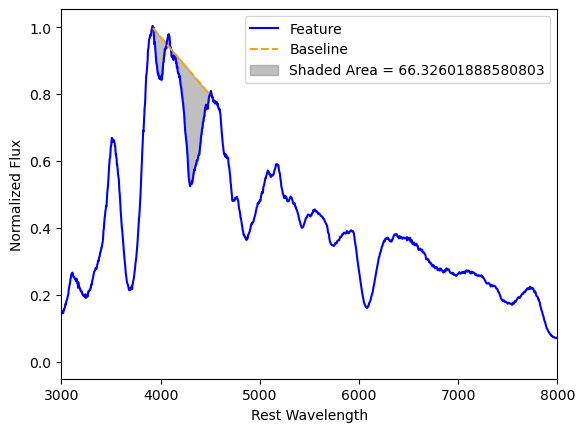

9 SN2011fe_2011-08-28_05-26-52_Keck1_LRIS_PTF-12.77d.ascii


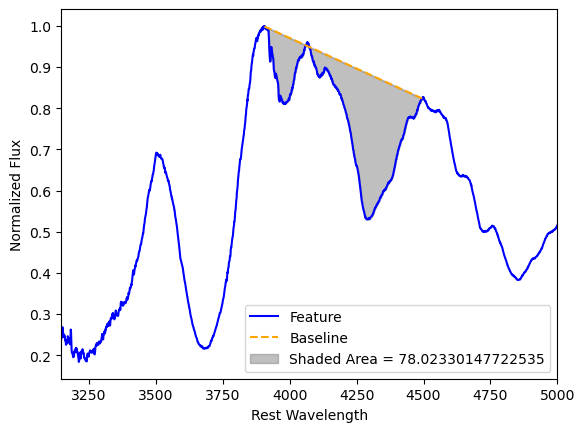

10 SN2011fe_2011-08-28_05-56-36_UH88_SNIFS_SNfactory_-12.75d.dat


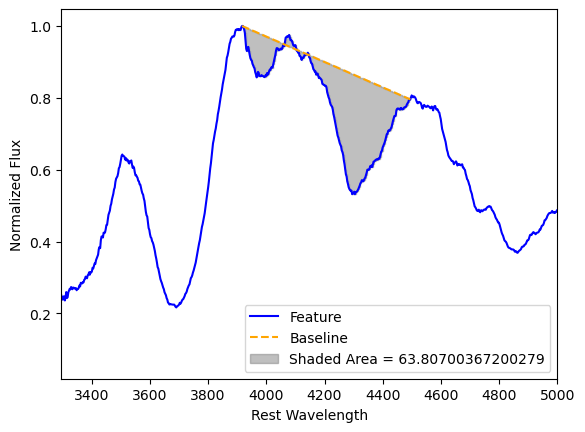

11 SN2011fe_2011-08-28_06-33-07_Keck1_LRIS_PTF_-12.73d.ascii


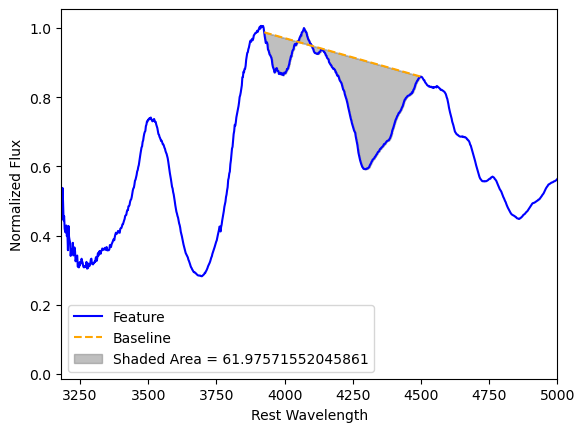

12 SN2011fe_2011-08-29_00-00-00_Gemini-N_GMOS_None_-12.00d.dat


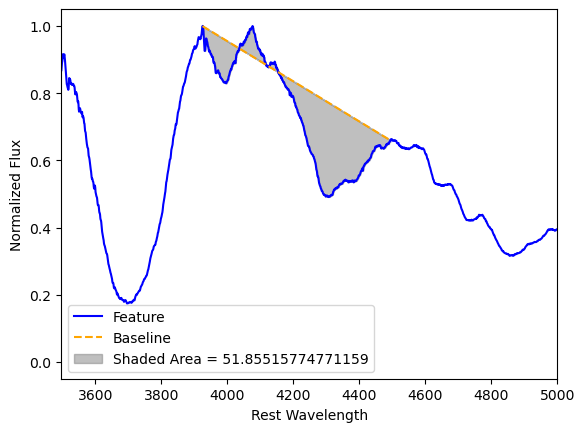

13 SN2011fe_2011-08-29_00-00-00_Gemini-N_GMOS_PTF_-12.00d.ascii


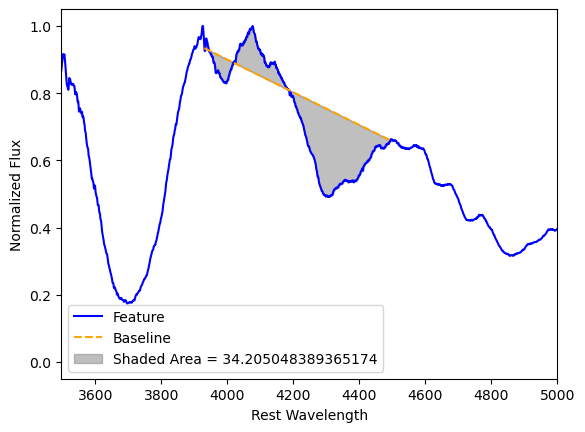

14 SN2011fe_2011-08-29_06-07-31_UH88_SNIFS_SNfactory_-11.74d.dat


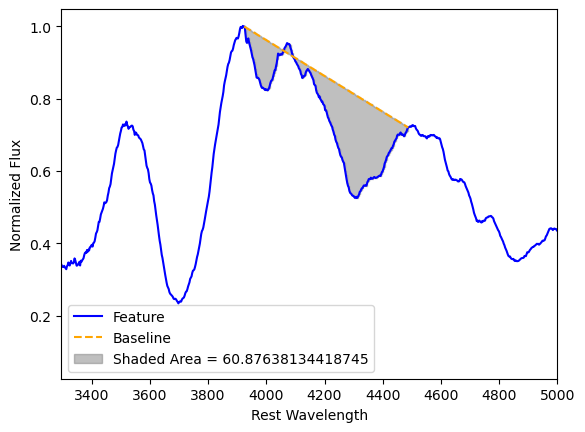

15 SN2011fe_2011-08-30_00-00-00_WHT-4.2m_ISIS_None_-11.00d.dat


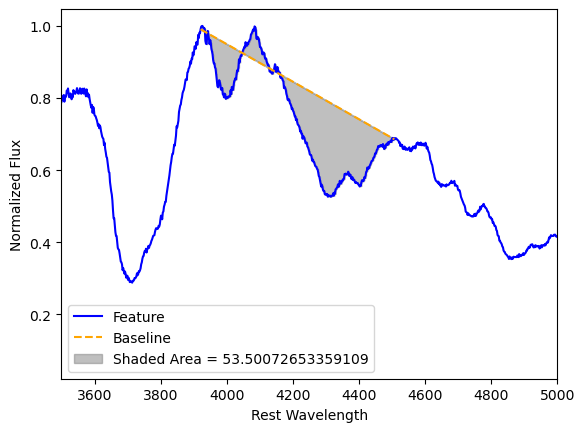

16 SN2011fe_2011-08-30_00-00-00_WHT-4.2m_ISIS_PTF_-11.00d.ascii


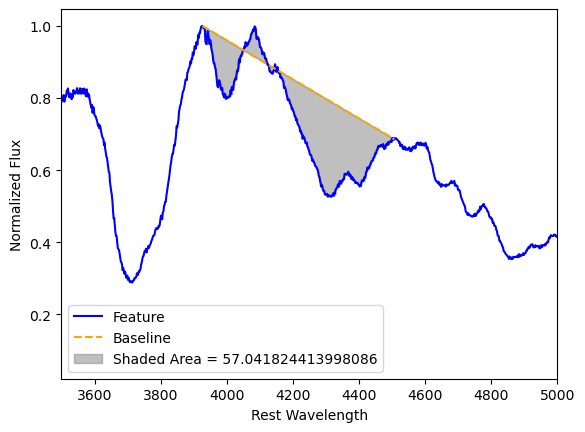

17 SN2011fe_2011-08-30_05-56-16_UH88_SNIFS_SNfactory_-10.75d.dat


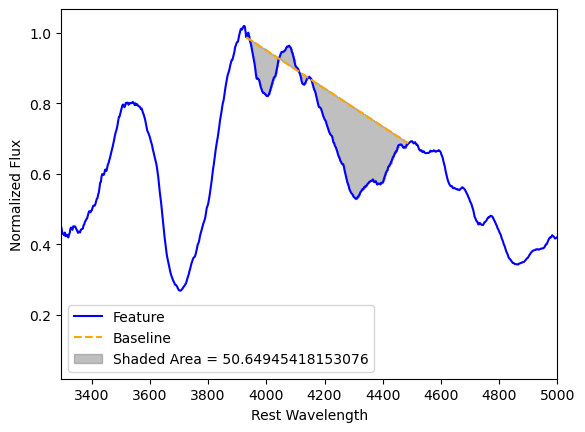

18 SN2011fe_2011-08-31_00-00-00_Keck1_LRIS_None_-10.00d.dat


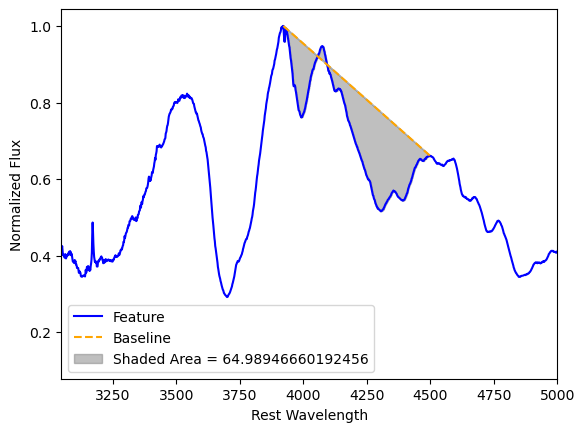

19 SN2011fe_2011-08-31_00-00-00_Keck1_LRIS_PTF_-10.00d.ascii


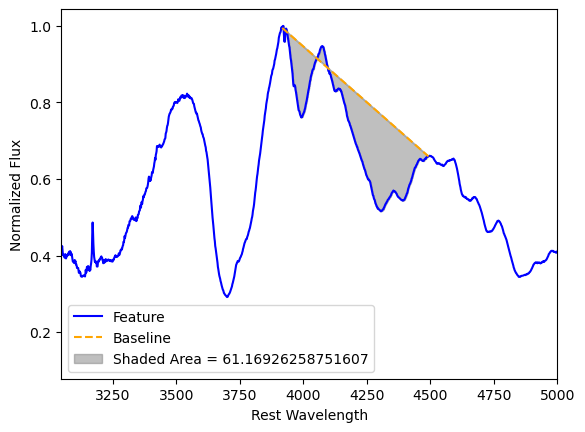

20 SN2011fe_2011-08-31_00-00-00_WHT-4.2m_ISIS_None_-10.00d.dat


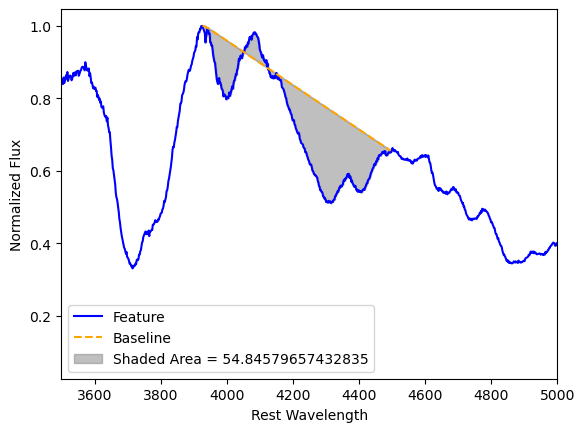

21 SN2011fe_2011-08-31_00-00-00_WHT-4.2m_ISIS_PTF_-10.00d.ascii


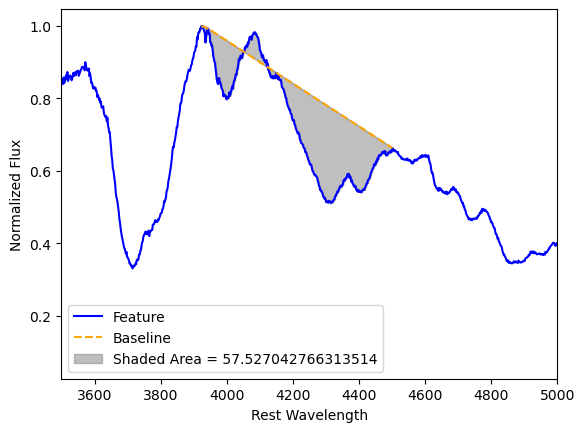

22 SN2011fe_2011-08-31_05-51-13_UH88_SNIFS_SNfactory_-09.76d.dat


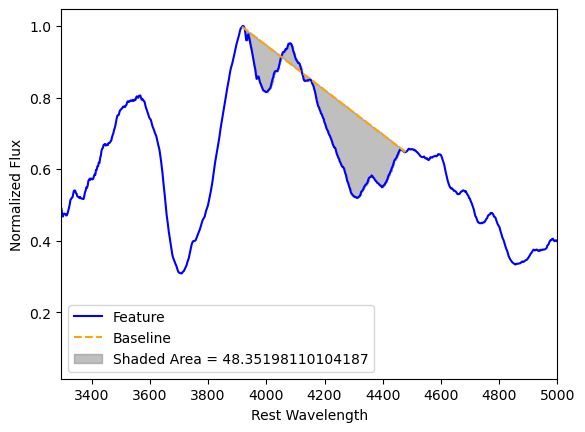

23 SN2011fe_2011-08-31_06-00-00_HST_STIS_HST-Ia_-09.75d.dat


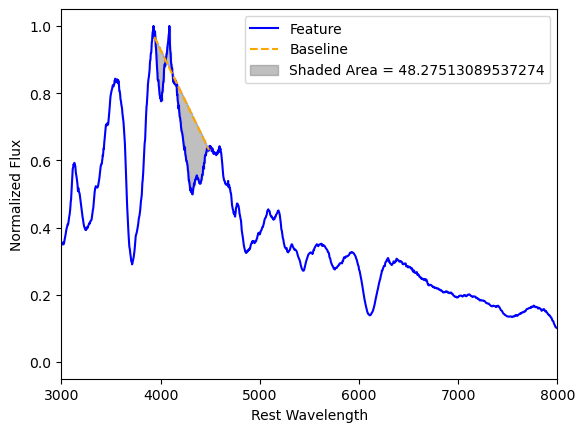

24 SN2011fe_2011-09-01_00-00-00_Gemini-N_GMOS_None_-09.00d.dat


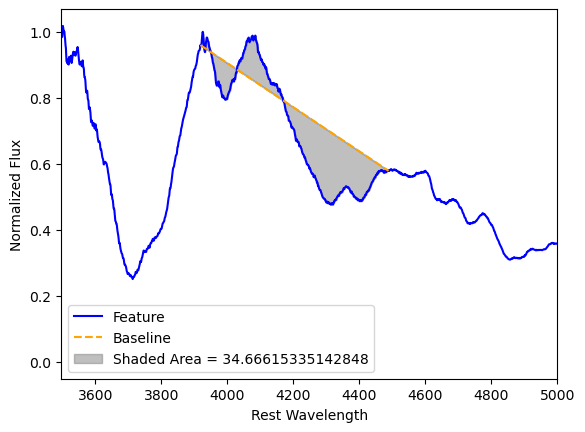

25 SN2011fe_2011-09-01_00-00-00_Gemini-N_GMOS_PTF_-09.00d.ascii


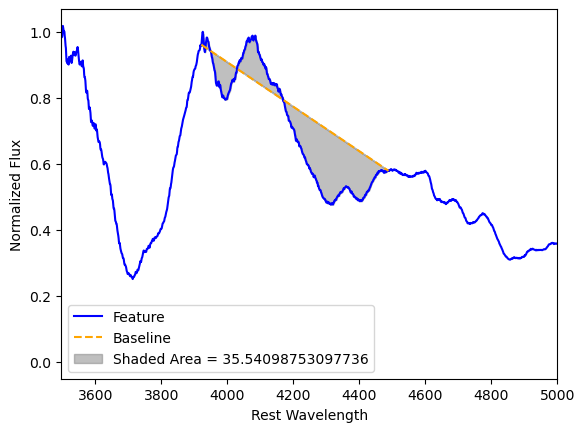

26 SN2011fe_2011-09-01_00-00-00_WHT-4.2m_ISIS_None_-09.00d.dat


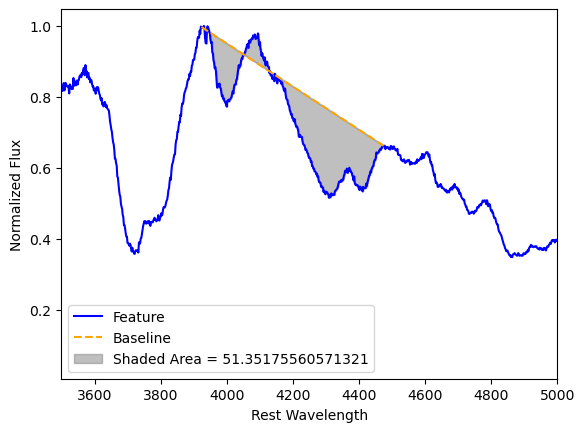

27 SN2011fe_2011-09-01_00-00-00_WHT-4.2m_ISIS_PTF_-09.00d.ascii


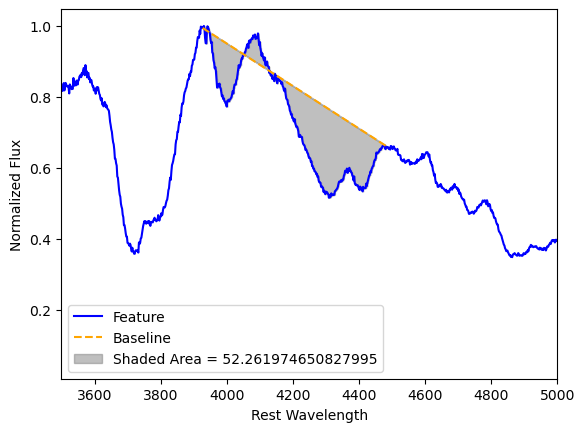

28 SN2011fe_2011-09-01_05-57-27_UH88_SNIFS_SNfactory_-08.75d.dat


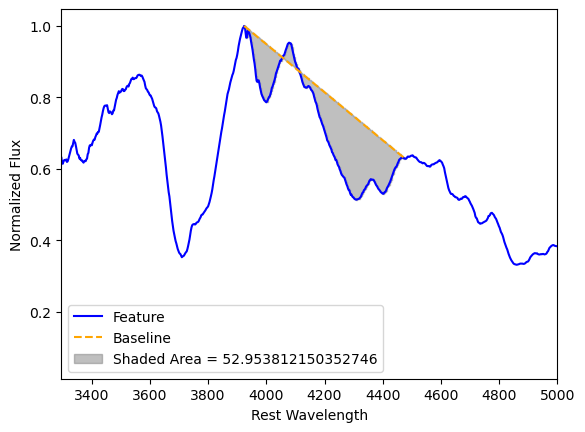

29 SN2011fe_2011-09-02_05-46-15_UH88_SNIFS_SNfactory_-07.76d.dat


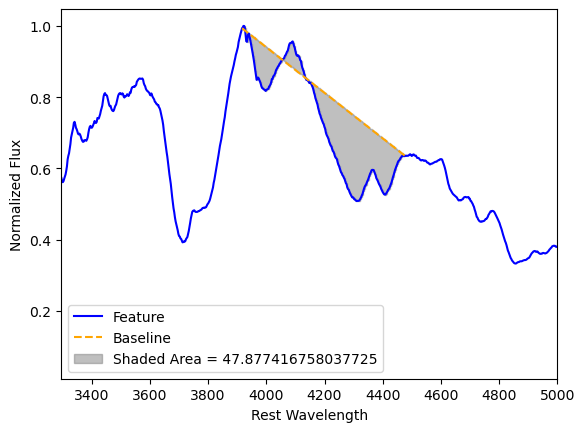

30 SN2011fe_2011-09-03_00-00-00_P200_DBSP_PTF-Ia_-07.00d.ascii


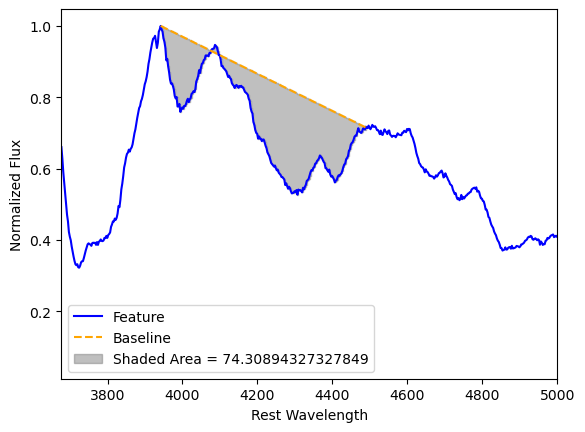

31 SN2011fe_2011-09-03_06-12-44_UH88_SNIFS_SNfactory_-06.74d.dat


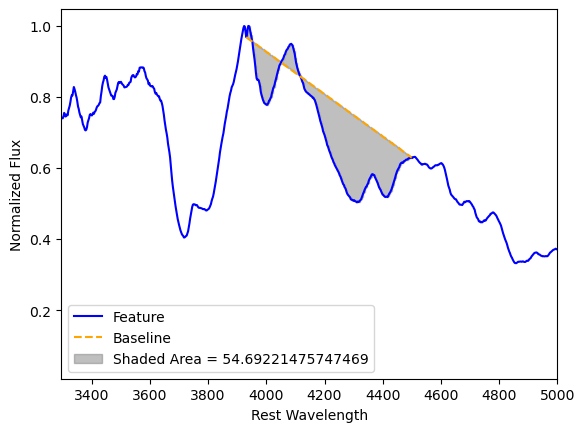

32 SN2011fe_2011-09-03_09-07-00_HST_STIS_HST-Ia_-06.62d.dat


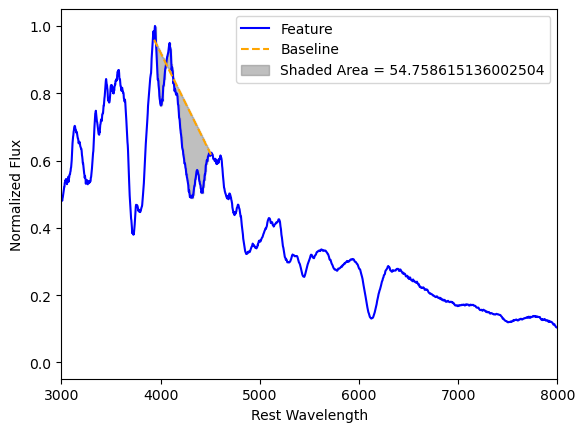

33 SN2011fe_2011-09-04_05-44-31_UH88_SNIFS_SNfactory_-05.76d.dat


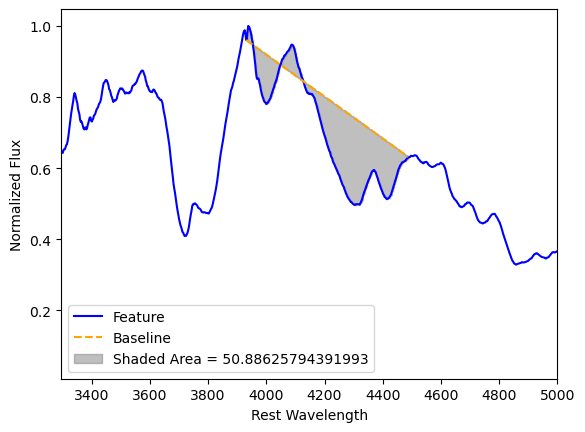

34 SN_2011fe_2011-08-25_03-54-43_Lick-3m_KAST_UCB-SNDB_-15.84d.flm


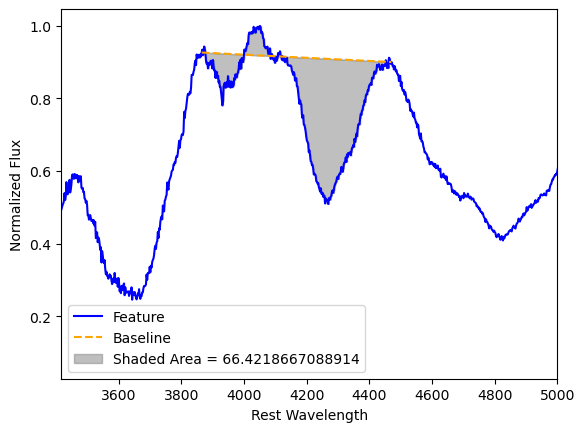

35 SN_2011fe_2011-08-28_06-33-07_Keck1_LRIS_UCB-SNDB_-12.73d.flm


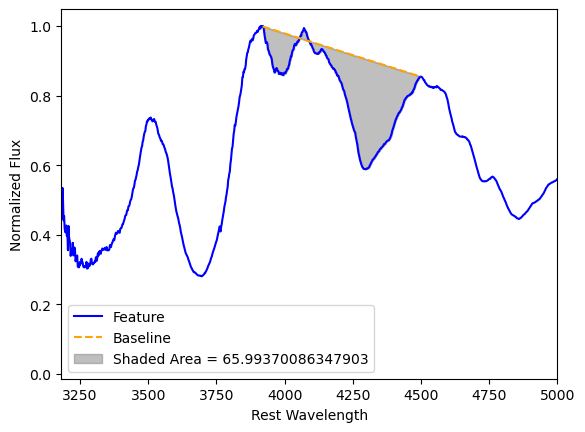

In [7]:
path11fe = r'C:\Users\senan\OneDrive\Desktop\Capstone\subtype_files\11fe'
#all11fe = listdir(path11fe)
#all11fe_wlcut = []
#for file in all11fe:                                                        #removes the files that arent in the wavelength range
#    data = pd.read_csv(path11fe + slash + file, delim_whitespace=True)
#    wl = np.array(data['wl']) / (1+0.000804)
#    if wl[0] > wavelength_min - 100:
#        all11fe_wlcut.append(file)

df11feclicks = pd.read_csv(r'C:\Users\senan\OneDrive\Desktop\Capstone\subtype_files\11fe_clicks.csv')
file = np.array(df11feclicks['File Name'])
wlx1 = np.array(df11feclicks['wl_x1_Ti'])
wlx2 = np.array(df11feclicks['wl_x2_Ti'])

a=0
phase_11fe = []
integral_11fe = []
for i in range(len(file)):
    a+=1
    print(a,file[i])
    df11fe=pd.read_csv(path11fe + slash + file[i], delim_whitespace=True)
    wl = np.array(df11fe['wl'])
    fl = np.array(df11fe['fl'])
    waveno = 1/(wl * 1e-4)                  #wave number in inverse microns #do this before correcting for redshift
    wl = wl/(1+0.000804)                    #redshift value for this SN
    R_v = 3.1
    A_v = R_v * 0.0077                      #mwebv values for this SN
    deredden_flux = remove(ccm89(waveno, A_v, R_v, unit='invum'), fl)

    if file[i][-6:-1] == '.asci':
        phase_11fe.append(float(file[i][-13:-7]))
    elif file[i][-4:-1] == '.da':
        phase_11fe.append(float(file[i][-11:-5]))
    elif file[i][-4:-1] == '.fl':
        phase_11fe.append(float(file[i][-11:-5]))

    # Filter data within the specified range
    mask1r = np.where(wl >= wlx1[i])
    mask1l =np.where(wl <= wlx1[i])
    if np.abs(wl[mask1r][0] - wlx1[i]) < np.abs(wl[mask1l][-1] - wlx1[i]):
         side1 = 'right'
    elif np.abs(wl[mask1r][0] - wlx1[i]) > np.abs(wl[mask1l][-1] - wlx1[i]):
         side1 = 'left'

    mask2r = np.where(wl >= wlx2[i])
    mask2l =np.where(wl <= wlx2[i])
    if np.abs(wl[mask2r][0] - wlx2[i]) < np.abs(wl[mask2l][-1] - wlx2[i]):
         side2 = 'right'
    elif np.abs(wl[mask2r][0] - wlx2[i]) > np.abs(wl[mask2l][-1] - wlx2[i]):
         side2 = 'left'
    if side1 == 'right' and side2 == 'left':
        mask = (wl >= wlx1[i]) & (wl <= wlx2[i])
    elif side1 == 'right' and side2 == 'right':
         mask = (wl >= wlx1[i]) & (wl <= wl[mask2r][0])
    elif side1 == 'left' and side2 == 'left':
         mask = (wl >= wl[mask1l][-1]) & (wl <= wlx2[i])
    elif side1 =='left' and side2 == 'right':
         mask = (wl >= wl[mask1l][-1]) & (wl <= wl[mask2r][0])
    
    filtered_wavelength = wl[mask]
    #filtered_flux = normalized_flux[mask]  # Use normalized flux
    filtered_flux = fl[mask]
    normalized_flux = fl / np.max(filtered_flux)
    normalized_filtered_flux = normalized_flux[mask]
    

    # Define the baseline as a linear line from the start to end of the filtered feature
    start_flux, end_flux = normalized_filtered_flux[0], normalized_filtered_flux[-1]
    baseline_flux = np.linspace(start_flux, end_flux, len(filtered_wavelength))

    # Calculate the area under the feature and baseline curves
    area_feature = integrate.simps(normalized_filtered_flux, filtered_wavelength)
    area_baseline = integrate.simps(baseline_flux, filtered_wavelength)

    # Calculate the shaded area (difference between the feature and baseline)
    shaded_area = area_baseline - area_feature
    integral_11fe.append(shaded_area)

    label = 'Shaded Area = ' + str(shaded_area)

    # Plot
    plt.plot(wl, normalized_flux, label='Feature', color='blue')
    plt.plot(filtered_wavelength, baseline_flux, label='Baseline', color='orange', linestyle='--')
    plt.fill_between(filtered_wavelength, baseline_flux, normalized_filtered_flux, 
                    color='gray', alpha=0.5, label=label, step='post')
    plt.xlabel("Rest Wavelength")
    plt.ylabel("Normalized Flux")
    if min(wl) < 3000:
         plt.xlim(3000,8000)
    else:
         plt.xlim(min(wl),5000)
    plt.legend()
    plt.show()

phase_11fe = np.array(phase_11fe)
integral_11fe = np.array(integral_11fe)

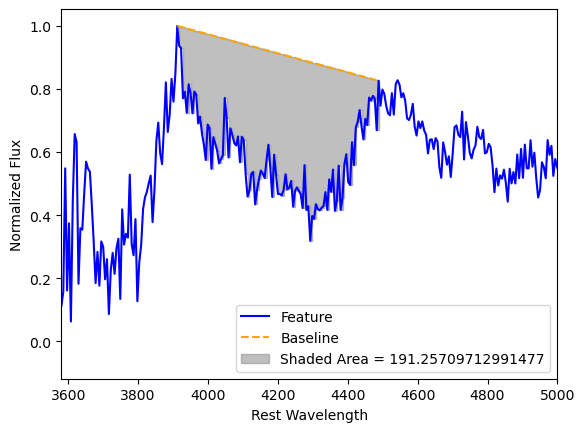

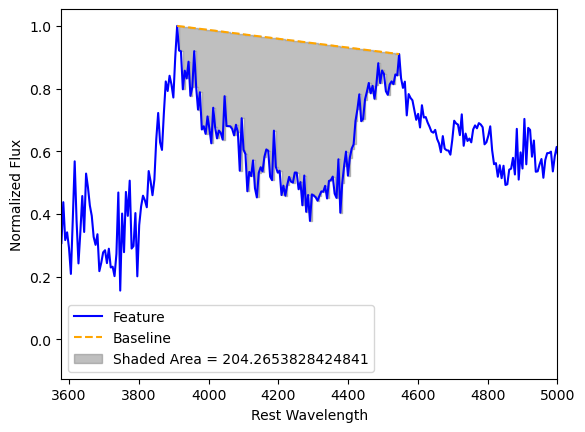

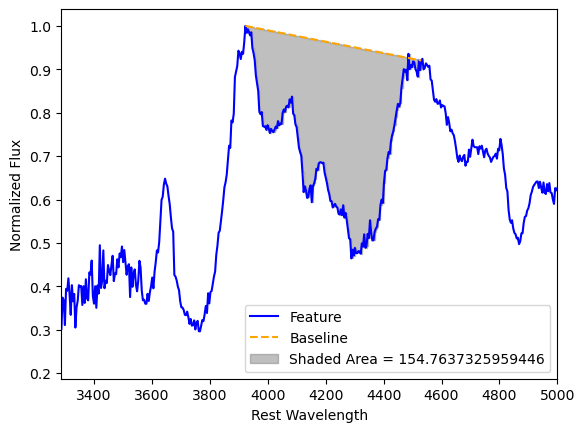

In [8]:
path91bg = r'C:\Users\senan\OneDrive\Desktop\Capstone\subtype_files\91bg'
df91bgclicks = pd.read_csv(r'C:\Users\senan\OneDrive\Desktop\Capstone\subtype_files\91bg_clicks_new.csv')
file = np.array(df91bgclicks['File Name'])
wlx1 = np.array(df91bgclicks['wl_x1_Ti'])
wlx2 = np.array(df91bgclicks['wl_x2_Ti'])


phase_91bg = []
integral_91bg = []

a=0
for i in range(len(file)):
    a+=1
    if file[i][-5:-1] == '.asc':
        df91bg=pd.read_csv(path91bg + slash + file[i], delim_whitespace=True)
    else:
        df91bg=pd.read_csv(path91bg + slash + file[i])
    wl = np.array(df91bg['wl'])
    fl = np.array(df91bg['fl'])
    waveno = 1/(wl * 1e-4)                  #wave number in inverse microns #do this before correcting for redshift
    wl = wl/(1+0.015)                    #redshift value for this SN
    R_v = 3.1
    A_v = R_v * 0.1245                     #mwebv values for this SN
    deredden_flux = remove(ccm89(waveno, A_v, R_v, unit='invum'), fl)
    phase_91bg.append(int(file[i][17:19]) - 25)

    # Filter data within the specified range
    mask1r = np.where(wl >= wlx1[i])
    mask1l =np.where(wl <= wlx1[i])
    if np.abs(wl[mask1r][0] - wlx1[i]) < np.abs(wl[mask1l][-1] - wlx1[i]):
         side1 = 'right'
    elif np.abs(wl[mask1r][0] - wlx1[i]) > np.abs(wl[mask1l][-1] - wlx1[i]):
         side1 = 'left'

    mask2r = np.where(wl >= wlx2[i])
    mask2l =np.where(wl <= wlx2[i])
    if np.abs(wl[mask2r][0] - wlx2[i]) < np.abs(wl[mask2l][-1] - wlx2[i]):
         side2 = 'right'
    elif np.abs(wl[mask2r][0] - wlx2[i]) > np.abs(wl[mask2l][-1] - wlx2[i]):
         side2 = 'left'
    if side1 == 'right' and side2 == 'left':
        mask = (wl >= wlx1[i]) & (wl <= wlx2[i])
    elif side1 == 'right' and side2 == 'right':
         mask = (wl >= wlx1[i]) & (wl <= wl[mask2r][0])
    elif side1 == 'left' and side2 == 'left':
         mask = (wl >= wl[mask1l][-1]) & (wl <= wlx2[i])
    elif side1 =='left' and side2 == 'right':
         mask = (wl >= wl[mask1l][-1]) & (wl <= wl[mask2r][0])
    
    filtered_wavelength = wl[mask]
    #filtered_flux = normalized_flux[mask]  # Use normalized flux
    filtered_flux = fl[mask]
    normalized_flux = fl / np.max(filtered_flux)
    normalized_filtered_flux = normalized_flux[mask]
    

    # Define the baseline as a linear line from the start to end of the filtered feature
    start_flux, end_flux = normalized_filtered_flux[0], normalized_filtered_flux[-1]
    baseline_flux = np.linspace(start_flux, end_flux, len(filtered_wavelength))

    # Calculate the area under the feature and baseline curves
    area_feature = integrate.simps(normalized_filtered_flux, filtered_wavelength)
    area_baseline = integrate.simps(baseline_flux, filtered_wavelength)

    # Calculate the shaded area (difference between the feature and baseline)
    shaded_area = area_baseline - area_feature
    integral_91bg.append(shaded_area)

    label = 'Shaded Area = ' + str(shaded_area)

    # Plot
    plt.plot(wl, normalized_flux, label='Feature', color='blue')
    plt.plot(filtered_wavelength, baseline_flux, label='Baseline', color='orange', linestyle='--')
    plt.fill_between(filtered_wavelength, baseline_flux, normalized_filtered_flux, 
                    color='gray', alpha=0.5, label=label, step='post')
    plt.xlabel("Rest Wavelength")
    plt.ylabel("Normalized Flux")
    if min(wl) < 3000:
         plt.xlim(3000,5000)
    else:
         plt.xlim(min(wl),5000)
    plt.legend()
    plt.show()

phase_91bg = np.array(phase_91bg)
integral_91bg = np.array(integral_91bg)

1 2022xkq_2022-10-13_00-00-00.000_AST3_AST3-Cam_None.txt


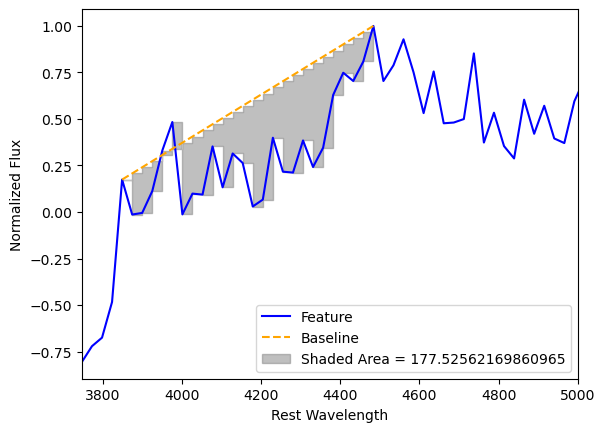

2 2022xkq_2022-10-13_10-30-33_P60_SEDM_TNS.txt


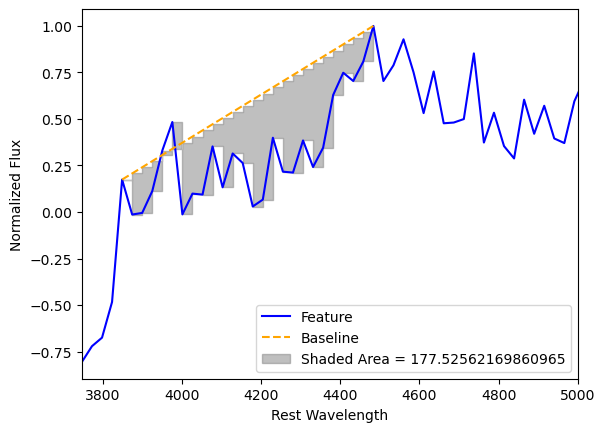

3 2022xkq_2022-10-15_07-59-08.051_ESO-NTT_EFOSC2-NTT_None.txt


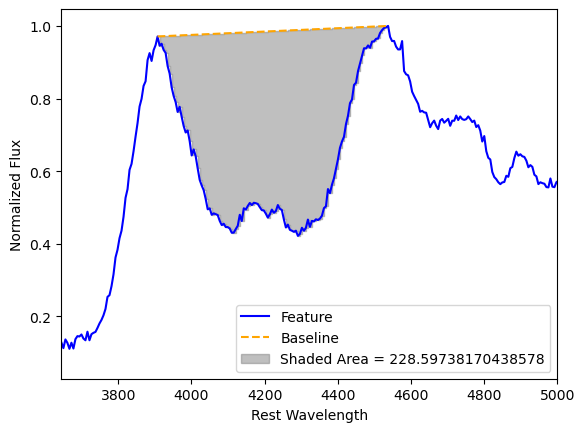

4 2022xkq_2022-10-15_12-32-15.127_FTN_FLOYDS-N_None.txt


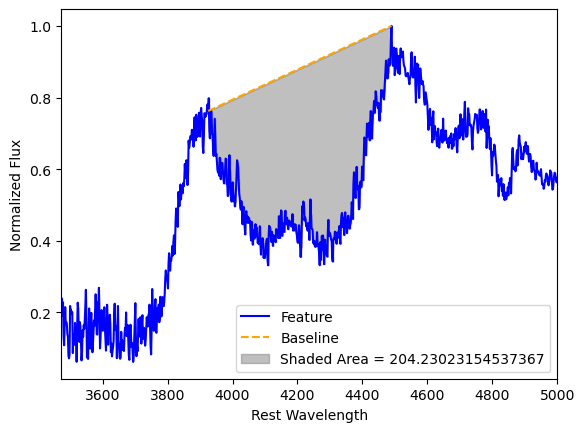

5 2022xkq_2022-10-16_03-59-17.551_ESO-NTT_EFOSC2-NTT_None.txt


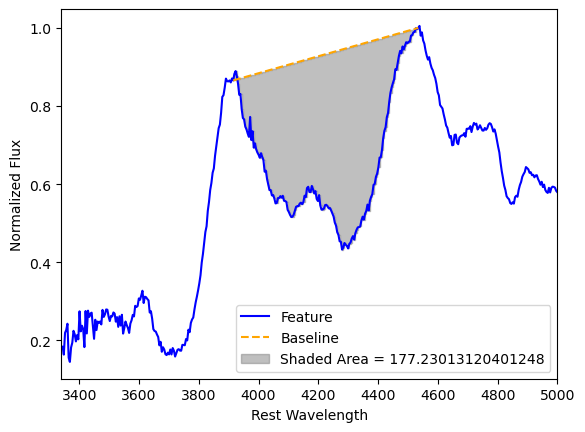

6 2022xkq_2022-10-17_00-00-00.000_P60_SEDM_None.txt


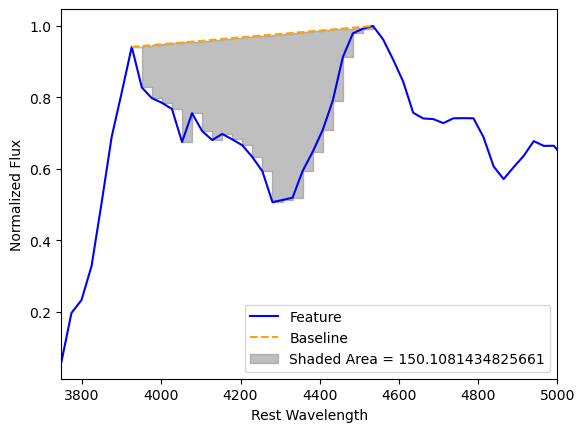

7 2022xkq_2022-10-17_01-55-12.000_NOT_ALFOSC_None.txt


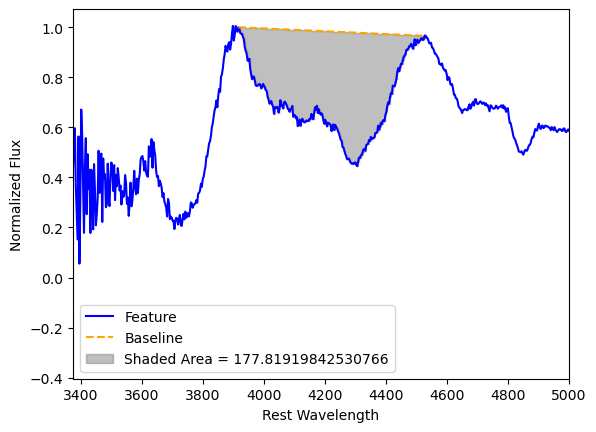

8 2022xkq_2022-10-17_04-10-52.888_SOAR_Goodman_None.txt


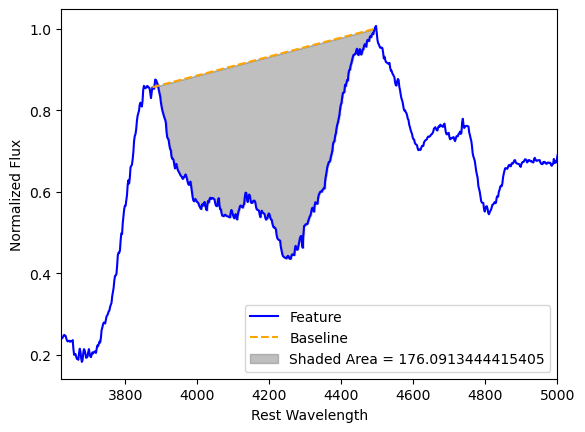

9 2022xkq_2022-10-17_07-34-57_P60_SEDM_TNS.txt


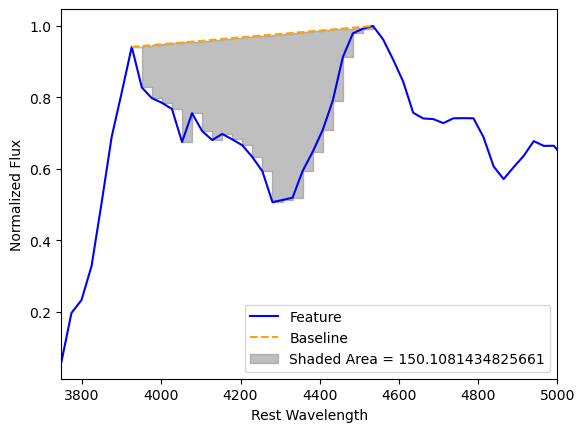

10 2022xkq_2022-10-17_13-40-46.358_FTN_FLOYDS-N_None.txt


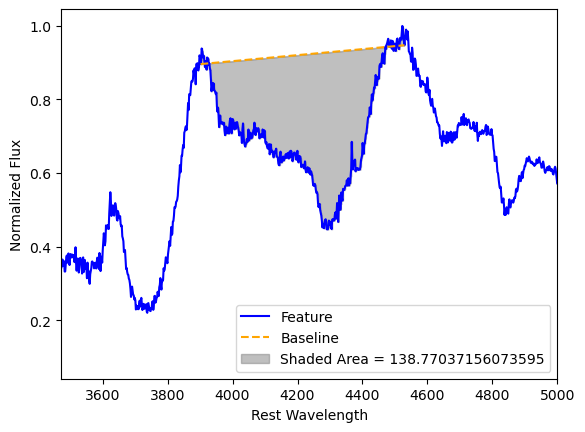

11 2022xkq_2022-10-19_12-26-46.522_UH88_SNIFS_None.dat


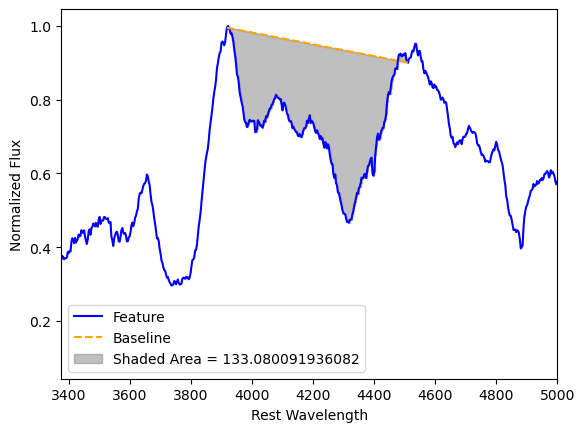

12 2022xkq_2022-10-20_13-41-40.713_FTN_FLOYDS-N_None.txt


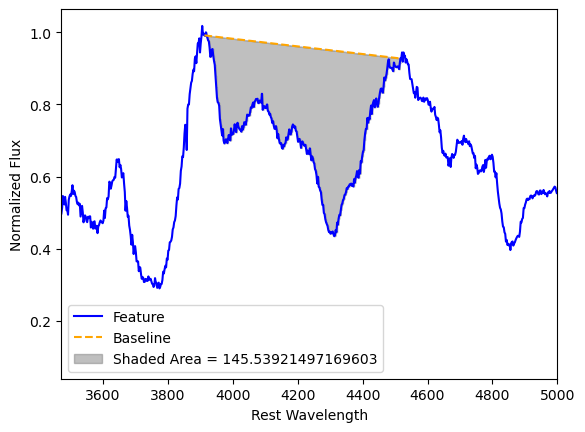

13 2022xkq_2022-10-21_14-14-06.311_FTN_FLOYDS-N_None.txt


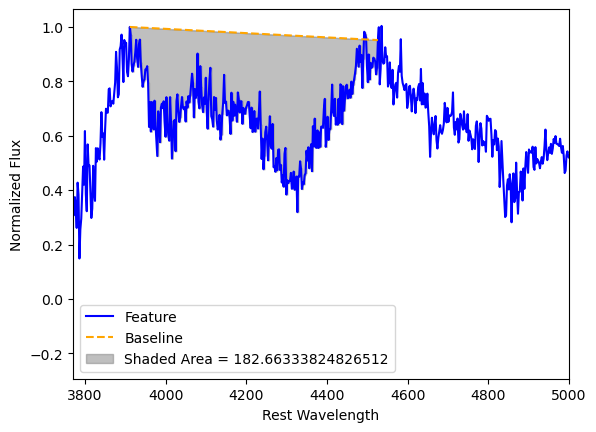

14 2022xkq_2022-10-22_01-40-48.000_NOT_ALFOSC_None.txt


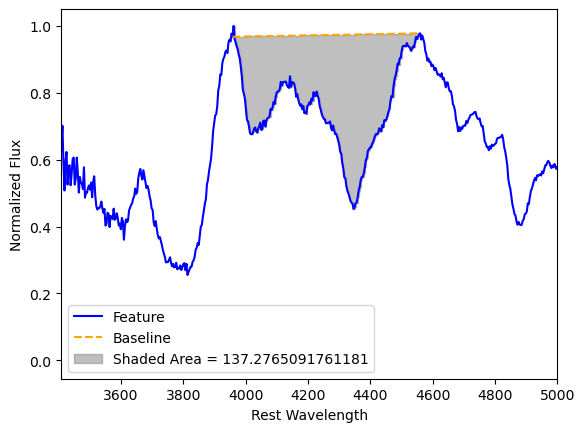

15 2022xkq_2022-10-22_13-46-33.514_UH88_SNIFS_None.dat


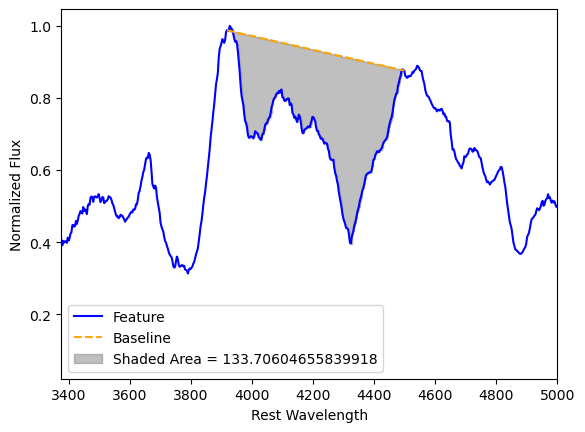

16 2022xkq_2022-10-24_02-38-24.000_NOT_ALFOSC_None.txt


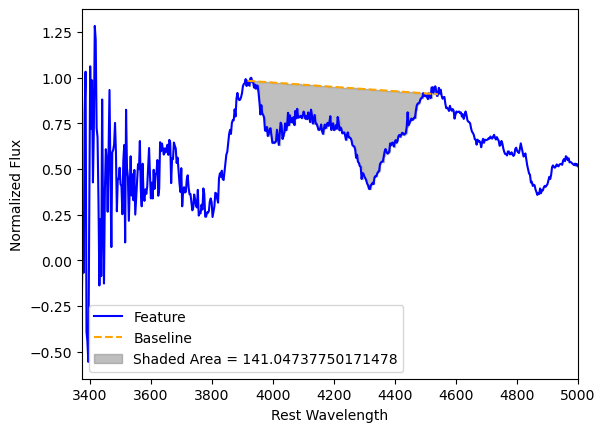

17 2022xkq_2022-10-24_13-01-40.261_FTN_FLOYDS-N_None.txt


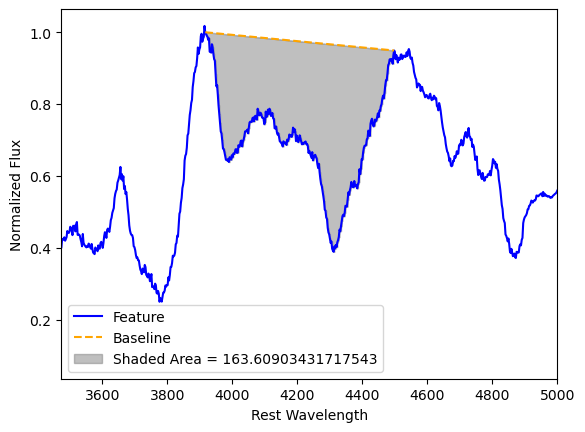

In [9]:
path86G = r'C:\Users\senan\OneDrive\Desktop\Capstone\subtype_files\86G'
df86Gclicks = pd.read_csv(r'C:\Users\senan\OneDrive\Desktop\Capstone\subtype_files\86G_clicks.csv')
file = np.array(df86Gclicks['File Name'])
wlx1 = np.array(df86Gclicks['wl_x1_Ti'])
wlx2 = np.array(df86Gclicks['wl_x2_Ti'])

phase_86G = []
integral_86G = []
a=0
for i in range(len(file)):
    a+=1
    print(a,file[i])
    df86G=pd.read_csv(path86G + slash + file[i], delim_whitespace=True)
    wl = np.array(df86G['wl'])
    fl = np.array(df86G['fl'])
    waveno = 1/(wl * 1e-4)                  #wave number in inverse microns #do this before correcting for redshift
    wl = wl/(1+0.007735)                    #redshift value for this SN
    R_v = 3.1
    A_v = R_v * 0.1155                    #mwebv values for this SN
    deredden_flux = remove(ccm89(waveno, A_v, R_v, unit='invum'), fl)
    
    phase_86G.append(int(file[i][16:18])-29)

    # Filter data within the specified range
    mask1r = np.where(wl >= wlx1[i])
    mask1l =np.where(wl <= wlx1[i])
    if np.abs(wl[mask1r][0] - wlx1[i]) < np.abs(wl[mask1l][-1] - wlx1[i]):
         side1 = 'right'
    elif np.abs(wl[mask1r][0] - wlx1[i]) > np.abs(wl[mask1l][-1] - wlx1[i]):
         side1 = 'left'

    mask2r = np.where(wl >= wlx2[i])
    mask2l =np.where(wl <= wlx2[i])
    if np.abs(wl[mask2r][0] - wlx2[i]) < np.abs(wl[mask2l][-1] - wlx2[i]):
         side2 = 'right'
    elif np.abs(wl[mask2r][0] - wlx2[i]) > np.abs(wl[mask2l][-1] - wlx2[i]):
         side2 = 'left'
    if side1 == 'right' and side2 == 'left':
        mask = (wl >= wlx1[i]) & (wl <= wlx2[i])
    elif side1 == 'right' and side2 == 'right':
         mask = (wl >= wlx1[i]) & (wl <= wl[mask2r][0])
    elif side1 == 'left' and side2 == 'left':
         mask = (wl >= wl[mask1l][-1]) & (wl <= wlx2[i])
    elif side1 =='left' and side2 == 'right':
         mask = (wl >= wl[mask1l][-1]) & (wl <= wl[mask2r][0])
    
    filtered_wavelength = wl[mask]
    #filtered_flux = normalized_flux[mask]  # Use normalized flux
    filtered_flux = fl[mask]
    normalized_flux = fl / np.max(filtered_flux)
    normalized_filtered_flux = normalized_flux[mask]
    

    # Define the baseline as a linear line from the start to end of the filtered feature
    start_flux, end_flux = normalized_filtered_flux[0], normalized_filtered_flux[-1]
    baseline_flux = np.linspace(start_flux, end_flux, len(filtered_wavelength))

    # Calculate the area under the feature and baseline curves
    area_feature = integrate.simps(normalized_filtered_flux, filtered_wavelength)
    area_baseline = integrate.simps(baseline_flux, filtered_wavelength)

    # Calculate the shaded area (difference between the feature and baseline)
    shaded_area = area_baseline - area_feature
    integral_86G.append(shaded_area)

    label = 'Shaded Area = ' + str(shaded_area)

    # Plot
    plt.plot(wl, normalized_flux, label='Feature', color='blue')
    plt.plot(filtered_wavelength, baseline_flux, label='Baseline', color='orange', linestyle='--')
    plt.fill_between(filtered_wavelength, baseline_flux, normalized_filtered_flux, 
                    color='gray', alpha=0.5, label=label, step='post')
    plt.xlabel("Rest Wavelength")
    plt.ylabel("Normalized Flux")
    if min(wl) < 3000:
         plt.xlim(3000,5000)
    else:
         plt.xlim(min(wl),5000)
    plt.legend()
    plt.show()

phase_86G = np.array(phase_86G)
integral_86G = np.array(integral_86G)

In [10]:
fe=linregress(phase_11fe,integral_11fe)
maskfe = np.where(phase_11fe >= -13)
bg=linregress(phase_91bg,integral_91bg)
maskbg = np.where(phase_91bg >= -13)
g=linregress(phase_86G,integral_86G)
maskg = np.where(phase_86G >= -13)
gs=linregress(phase04gs, integral04gs)

(-13.0, -4.0)

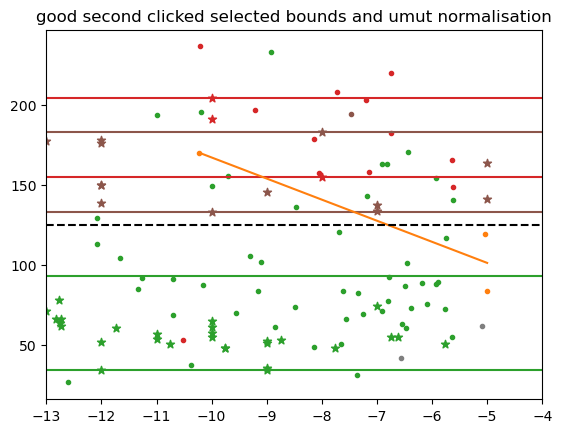

In [16]:
plt.scatter(phase_91bg,integral_91bg, color='tab:red', marker='*')
plt.axhline(y=max(integral_91bg), color='tab:red')
plt.axhline(y=min(integral_91bg), color='tab:red')
#plt.plot(phase_91bg, (bg.slope*phase_91bg) + bg.intercept, color='tab:red')

plt.scatter(phase_86G,integral_86G, color='tab:brown', marker='*')
plt.axhline(y=max(integral_86G[maskg]), color='tab:brown')
plt.axhline(y=min(integral_86G[maskg]), color='tab:brown')
#plt.plot(phase_86G, (g.slope*phase_86G) + g.intercept, color='tab:brown')

plt.scatter(phase_11fe,integral_11fe, color='tab:green', marker='*')
plt.axhline(y=max(integral_11fe), color='tab:green')
plt.axhline(y=min(integral_11fe), color='tab:green')
#plt.plot(phase_11fe, (fe.slope*phase_11fe) + fe.intercept, color='tab:green')

plt.plot(phase04gs, (gs.slope*phase04gs) + gs.intercept, color='tab:orange')
plt.axhline(y=125, color='black', linestyle='--')
plt.title('good second clicked selected bounds and umut normalisation')
for j in range(len(subtype)):
    if subtype[j] == 'norm':
        colour = 'tab:green'
    elif subtype[j] == '91bg':
        colour = 'tab:red'
    elif subtype[j] == '99aa':
        colour = 'tab:cyan'
    elif subtype[j] == 'norm/04gs':
        colour = 'tab:orange'
    elif subtype[j] == '91bg/86G':
        colour = 'tab:brown'
    elif subtype[j] == '91T':
        colour = 'tab:blue' 
    elif subtype[j] == 'SN Ia':
        colour = 'tab:gray'
    plt.scatter(phasec2[j],integralc2[j], color=colour, marker='.')
plt.xlim(-13,-4)